In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [3]:
print(tf.__version__)

2.11.0


In [4]:
base_dir = '/kaggle/input/car-damage-detection/data1a'
train_dir = os.path.join(base_dir, '/kaggle/input/car-damage-detection/data1a/training')

In [5]:
os.listdir(base_dir)

['validation', 'training']

In [6]:
os.listdir(train_dir)

['00-damage', '01-whole']

In [80]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range=0.2,
                  validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
                    directory='/kaggle/input/car-damage-detection/data1a/training',
                    target_size=(224, 224),
                    color_mode='rgb',
                    batch_size=32,
                    class_mode='categorical',
                    subset='training')

validation_generator = train_datagen.flow_from_directory(
                          directory='/kaggle/input/car-damage-detection/data1a/training',
                          target_size=(224, 224),
                          color_mode='rgb',
                          batch_size=32,
                          class_mode='categorical',
                          subset='validation')

test_datagen = ImageDataGenerator(horizontal_flip=True,
                  shear_range=0.2,
                  validation_split=0.4)

test_gen = test_datagen.flow_from_directory(
    directory='/kaggle/input/car-damage-detection/data1a/training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 1104 images belonging to 2 classes.
Found 736 images belonging to 2 classes.
Found 1840 images belonging to 2 classes.


In [81]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 26, 26, 128)    

In [83]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=35,
    validation_data=validation_generator,
    validation_steps=validation_generator.n//validation_generator.batch_size
)

Epoch 1/35
34/34 [==============================] - 100s 3s/step - loss: 28.9201 - accuracy: 0.5224 - val_loss: 0.6906 - val_accuracy: 0.5870
Epoch 2/35
34/34 [==============================] - 96s 3s/step - loss: 0.7436 - accuracy: 0.5812 - val_loss: 0.6526 - val_accuracy: 0.6264
Epoch 3/35
34/34 [==============================] - 98s 3s/step - loss: 0.6579 - accuracy: 0.6194 - val_loss: 0.6541 - val_accuracy: 0.6522
Epoch 4/35
34/34 [==============================] - 96s 3s/step - loss: 0.6115 - accuracy: 0.6716 - val_loss: 0.6204 - val_accuracy: 0.6929
Epoch 5/35
34/34 [==============================] - 97s 3s/step - loss: 0.5932 - accuracy: 0.6996 - val_loss: 0.6161 - val_accuracy: 0.6603
Epoch 6/35
34/34 [==============================] - 97s 3s/step - loss: 0.5776 - accuracy: 0.6894 - val_loss: 0.5740 - val_accuracy: 0.7215
Epoch 7/35
34/34 [==============================] - 98s 3s/step - loss: 0.5536 - accuracy: 0.7388 - val_loss: 0.5780 - val_accuracy: 0.7296
Epoch 8/35
34/34 [

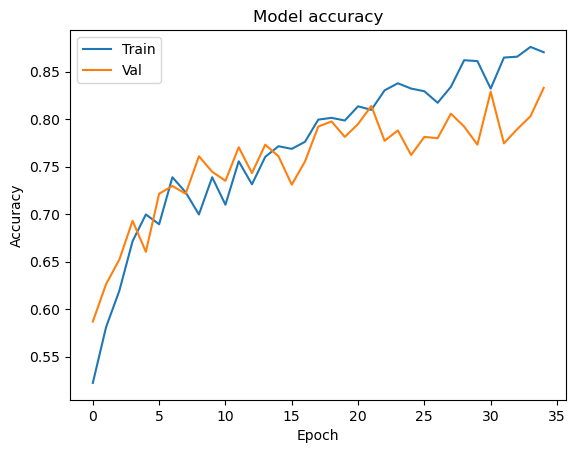

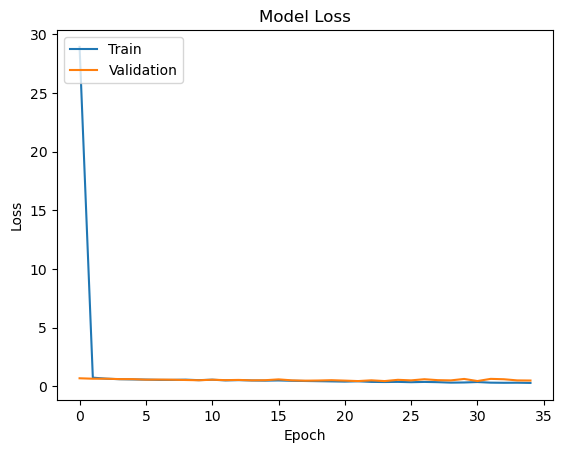

In [84]:
# Plot the accuracy and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [85]:
test_loss, test_acc = model.evaluate(test_gen, verbose=2)
print('Test accuracy:', test_acc)

58/58 - 56s - loss: 0.3239 - accuracy: 0.8842 - 56s/epoch - 966ms/step
Test accuracy: 0.884239137172699


58/58 - 56s - loss: 0.3393 - accuracy: 0.8810 - 56s/epoch - 962ms/step


<AxesSubplot:xlabel='metric', ylabel='value'>

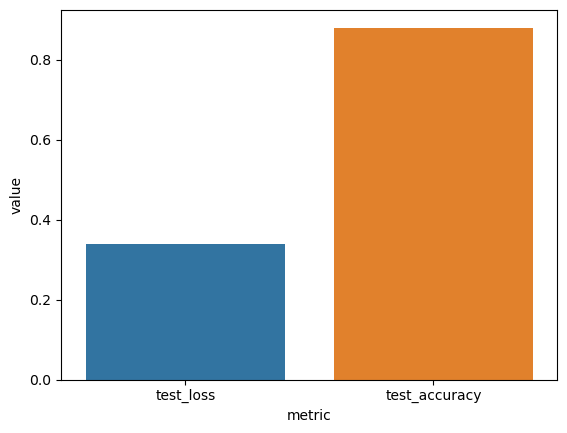

In [86]:
import pandas as pd
import seaborn as sns

# Get test loss and accuracy
test_loss, test_acc = model.evaluate(test_gen, verbose=2)

# Create DataFrame
results_df = pd.DataFrame({'metric': ['test_loss', 'test_accuracy'],
                           'value': [test_loss, test_acc]})

# Plot using seaborn
sns.barplot(x='metric', y='value', data=results_df)

In [87]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.33255
Test Accuracy: 87.99%


In [96]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

img = load_img('/kaggle/input/car-damage-detection/data1a/training/00-damage/0006.JPEG', target_size=(224, 224))
x = tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)


pred = model.predict(x)
print(pred)


1/1 [==============================] - 0s 50ms/step
[[0.93390894 0.06609106]]


In [100]:
from keras.models import load_model

# Simpan model
model.save('mobilrusak.h5')
